# 2018 회귀 결과
- LinearReuniquession, Ridge, Lasso   
MSE: 0.14737564803426398, RMSE: 0.3838953607876292, R2: 0.7574744440349567  
LinearRegression RMSE:  0.384  
Ridge RMSE:  0.377   
Lasso RMSE:  0.732  

- LinearReuniquession, Ridge, Lasso(GridSearchCV)  
MSE: 0.14737564803426398, RMSE: 0.3838953607876292, R2: 0.7574744440349567  
LinearRegression RMSE:  0.384    
Ridge RMSE:  0.377  
Lasso RMSE:  0.732  

- RandomForestRegressor(log1p적용)  
MSE: 0.12008736867378204, RMSE: 0.3465362443869069, R2: 0.8545969825028206    

- RandomForestRegressor(GridSearchCV)  
MSE: 0.12406123216437977, RMSE: 0.35222327033343465, R2: 0.8497853878360708  

- XGBoost  
MSE: 0.09364616922176625, RMSE: 0.30601661592430934, R2: 0.8866122579562433  

- GBM  
RMSE:  0.306, R2: 0.8866122579562433  

- LightGBM  
RMSE:  0.346, R2: 0.8552899147469343  

# import

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 전처리


In [68]:
test5 = pd.read_csv('2018_전처리_최종.csv')
test5

,총생활인구수,기온,기압,풍속,운량,일강수량,최대순간풍속풍향,최대풍속풍향,평균풍속,최다풍향,일최심적설,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,month,day,영등포구
0,10534264.0,2.849341,-1.158559,-0.744387,-1.876387,0.0,320,290,1.4,290,0.0,0.0,0.0,38.0,1,0,4,1,1,421.0
1,12237724.0,2.938423,-1.146482,0.305281,-1.743011,0.0,270,290,1.8,290,0.0,0.0,0.0,32.0,0,1,4,1,2,820.0
2,12312633.0,3.383496,-1.194788,-1.028035,-1.345348,0.0,320,270,2.2,290,0.0,0.0,0.0,32.0,0,2,4,1,3,839.0
3,12368761.0,3.464808,-1.194788,-1.259058,-1.185199,0.0,320,320,1.4,290,0.0,0.0,0.0,40.0,0,3,4,1,4,749.0
4,12368042.0,3.001599,-1.122329,-0.567700,-0.894191,0.0,250,270,1.7,290,0.0,0.0,0.0,46.0,0,4,4,1,5,878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12149493.0,4.594838,-1.315554,1.358369,-2.501054,0.0,320,290,3.5,290,0.0,0.0,0.0,27.0,0,3,4,12,27,1039.0
361,12085612.0,4.630677,-1.303478,-0.061580,-1.986330,0.0,340,270,2.5,290,0.0,0.0,0.0,32.0,0,4,4,12,28,991.0
362,10816455.0,4.096312,-1.291401,0.901454,-2.383556,0.0,340,320,2.9,290,0.0,0.0,0.0,32.0,0,5,4,12,29,580.0
363,10738495.0,3.869557,-1.255171,-1.540995,-1.852954,0.0,340,340,1.2,290,0.0,0.0,0.0,36.0,0,6,4,12,30,586.0


# LinearReuniquession, Ridge, Lasso

In [69]:
test5[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= test5[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [70]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3), f'R2: {r2_score(y_test, pred)}')
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [71]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [72]:
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  716.273 R2: 0.7737281817802966
Ridge RMSE:  718.492 R2: 0.7723241435499458
Lasso RMSE:  716.556 R2: 0.7735492475471613


[716.2730925109762, 718.4919272683057, 716.5562485164104]

In [73]:
# 왜곡도 확인
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>1]
skew_features_top.sort_values(ascending=False)

일최심신적설    12.976338
일최심적설      9.995742
일강수량       4.932862
평균풍속       1.094541
dtype: float64

In [74]:
# 왜곡도 1 이상은 로그로 변환
test5[skew_features_top.index]= np.log1p(test5[skew_features_top.index])

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

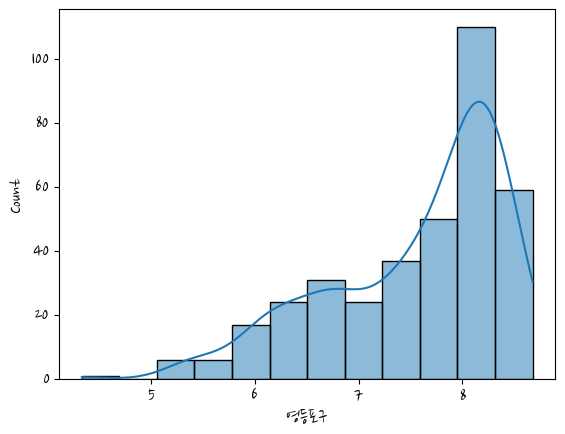

In [75]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])
sns.histplot(log_test, kde=True)

In [76]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

### 한번해보는거~~

In [11]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

MSE: 0.14737564803426398, RMSE: 0.3838953607876292, R2: 0.7574744440349567
LinearRegression RMSE:  0.384 R2: 0.7574744440349567
Ridge RMSE:  0.377 R2: 0.7666346810333009
Lasso RMSE:  0.732 R2: 0.11729582213671896


[0.3838953607876292, 0.3765756781839295, 0.7323888105609081]

In [12]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

747.9999999999998, 753.4153277569247
3326.0000000000023, 3600.8897282136923
421.0000000000001, 479.87738136156753
3113.0000000000005, 2892.194405766273
1906.9999999999993, 1625.9556762836462
511.9999999999999, 488.82920767190814
417.9999999999999, 483.72738183264414
1250.0000000000005, 1569.5969595547995
4657.000000000002, 3719.2335995811222
3324.999999999998, 4513.375859305803
4458.999999999998, 4660.462823130335
3417.0000000000027, 3611.586583957862
1831.9999999999995, 858.5565099856232
4020.000000000003, 4843.408075686532
2776.0, 2616.544726556916
1556.0000000000002, 969.651275826374
2244.9999999999995, 3331.653392020862
3918.9999999999995, 4578.461376245605
1296.9999999999995, 1032.3019375691845
2368.999999999999, 3158.7847453667528
3548.000000000002, 3628.212707329319
4349.000000000002, 3901.246543315068
2819.999999999999, 2405.0606512190006
5799.999999999996, 3689.1840780600946
1362.0000000000005, 1048.8941312237139
3281.000000000001, 5840.085103723661
3567.9999999999995, 7764.46

## cross_val_score

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [14]:
X_data = test5.drop(columns=['영등포구'])
y_target = test5['영등포구']


ridge = Ridge(alpha=5)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [15]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)) #rmse = 5개가 나올 것
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} cv rmse 값 리스트 : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} cv 평균 rmse 값 : {np.round(rmse_avg,3)}')

get_avg_rmse_cv(models)

LinearRegression cv rmse 값 리스트 : [0.829 0.48  0.403 0.454 0.49 ]
LinearRegression cv 평균 rmse 값 : 0.531
Ridge cv rmse 값 리스트 : [0.828 0.485 0.402 0.436 0.467]
Ridge cv 평균 rmse 값 : 0.524
Lasso cv rmse 값 리스트 : [1.516 0.851 0.773 0.881 0.579]
Lasso cv 평균 rmse 값 : 0.92


## GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model,params,scoring='neg_mean_squared_error', cv=10) #GridSearchCV라서 scoring='neg' #scoring='neg_mean_squared_error' 예측값과 차이의 제곱?
    grid_model.fit(X,y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값:{np.round(rmse, 4)}, 최적 alpha값:{grid_model.best_params_}')

In [18]:
ridge_param = {
    'alpha':[0.0001,0.01,0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 30, 40, 50, 100]
} #ridge더 크게 rasso 더 작게
print_best_params(ridge_reg, ridge_param)

Ridge 5 cv시 최적 평균 rmse 값:0.4331, 최적 alpha값:{'alpha': 5}


In [19]:
lasso_param = {'alpha':[0.0001,0.001, 0.005, 0.008, 0.05, 0.05, 0.1, 0.5, 1, 5, 10, 15, 30]} 
print_best_params(lasso_reg, lasso_param)

Lasso 5 cv시 최적 평균 rmse 값:0.4727, 최적 alpha값:{'alpha': 0.005}


In [20]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train,y_train)

models=[lr_reg, ridge_reg,lasso_reg] 
get_rmses(models)

#visualize_coefficient(models)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


LinearRegression RMSE:  0.384 R2: 0.7574744440349567
Ridge RMSE:  0.368 R2: 0.7772987815433321
Lasso RMSE:  0.348 R2: 0.8010291363229064
MSE: 0.14737564803426398, RMSE: 0.3838953607876292, R2: 0.7574744440349567


In [21]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')




ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_rmse(model)

MSE: 0.14737564803426398, RMSE: 0.3838953607876292, R2: 0.7574744440349567
LinearRegression RMSE:  0.384 R2: 0.7574744440349567
Ridge RMSE:  0.377 R2: 0.7666346810333009
Lasso RMSE:  0.732 R2: 0.11729582213671896


# RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [24]:
rf_clf = RandomForestRegressor(random_state=156, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.127104304411172, RMSE: 0.35651690620666504, R2: 0.8461008047526701


In [25]:
log_test = np.log1p(test5['영등포구'])
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [26]:
rf_clf = RandomForestRegressor(random_state=32, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

MSE: 0.12008736867378204, RMSE: 0.3465362443869069, R2: 0.8545969825028206


## GridSearchCV 
RandomForestRegressor - 하이퍼 파라미터 수정

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
params = {
    'max_depth': [6, 12, 18, 26, 30],
    'min_samples_leaf': [1, 6, 12, 18, 24],
    'min_samples_split':[2, 6, 12, 18, 24]
}

In [29]:
rf_clf = RandomForestRegressor(n_estimators=100, random_state=32, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미너:\n', grid_cv.best_params_)

최적 하이퍼 파라미너:
 {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [30]:
rf_clf1    = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_leaf=1, min_samples_split=6, random_state=32)
rf_clf1.fit(X_train,y_train)

pred = rf_clf1.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.12406123216437977, RMSE: 0.35222327033343465, R2: 0.8497853878360708


# XGBoost 

In [77]:
import xgboost as xgb
from xgboost import XGBRegressor

In [78]:
import xgboost

print(xgboost.__version__)

1.5.0


In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [80]:
#학습용(80%), 데이터용(20%)
log_test = np.log1p(test5['영등포구'])
#test = test5['영등포구']
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [81]:
#최종 학습용(90%), 검즘용(10%)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=32)

In [82]:
#학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [83]:
params = {
    'max_depth':3,
    'eta':0.05,
    #'objective':'binary:logistic',
    # 'eval_metric':'logloss'
}
num_rounds = 400

In [84]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=500, evals=eval_list)

# pred = xgb_model.predict(dtest)
# print(pred)

pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


[0]	train-rmse:6.78144	eval-rmse:6.78472
[1]	train-rmse:6.44733	eval-rmse:6.45758
[2]	train-rmse:6.12977	eval-rmse:6.14542
[3]	train-rmse:5.82805	eval-rmse:5.84722
[4]	train-rmse:5.54135	eval-rmse:5.56566
[5]	train-rmse:5.26899	eval-rmse:5.29960
[6]	train-rmse:5.01015	eval-rmse:5.04497
[7]	train-rmse:4.76424	eval-rmse:4.80204
[8]	train-rmse:4.53060	eval-rmse:4.57229
[9]	train-rmse:4.30866	eval-rmse:4.35620
[10]	train-rmse:4.09765	eval-rmse:4.15464
[11]	train-rmse:3.89729	eval-rmse:3.95726
[12]	train-rmse:3.70684	eval-rmse:3.77078
[13]	train-rmse:3.52599	eval-rmse:3.59499
[14]	train-rmse:3.35397	eval-rmse:3.42928
[15]	train-rmse:3.19067	eval-rmse:3.27119
[16]	train-rmse:3.03563	eval-rmse:3.12106
[17]	train-rmse:2.88815	eval-rmse:2.97646
[18]	train-rmse:2.74811	eval-rmse:2.83929
[19]	train-rmse:2.61504	eval-rmse:2.71130
[20]	train-rmse:2.48850	eval-rmse:2.58774
[21]	train-rmse:2.36840	eval-rmse:2.47125
[22]	train-rmse:2.25419	eval-rmse:2.36068
[23]	train-rmse:2.14573	eval-rmse:2.25597
[2

## gridsearchCV

In [93]:
grid_cv = GridSearchCV(xgbt, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미너:\n', grid_cv.best_params_)

[11:01:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


최적 하이퍼 파라미너:
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [92]:
params = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_leaf': [1, 2,3,4,5,6],
    'min_samples_split':[2, 3,4, 5, 6]
}

### 인터넷에서 본거~

In [96]:
import xgboost
xgbt = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6
                    ,min_samples_leaf= 1, min_samples_split= 2)
xgbt.fit(X_train,y_train)
pred = xgbt.predict(X_test)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

[11:10:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MSE: 0.09364616922176625, RMSE: 0.30601661592430934, R2: 0.8945273170954298


In [97]:
0.09364616922176625
0.30601661592430934
0.8866122579562433

0.30601661592430934

In [61]:
from lightgbm import plot_importance

In [54]:
inf = xgb_model.feature_importances_
fff = pd.Series(inf, index = X_train.columns)
ft20 = fff.sort_values(ascending = False)[:20]

sns.barplot(x = ft20, y = ft20.index)
plt.show()

AttributeError: 'Booster' object has no attribute 'feature_importances_'

In [39]:
y_t= np.expm1(y_test)
p_t = pd.Series(np.expm1(pred))
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

# mse = mean_squared_error(dtest, pred)
# rmse = np.sqrt(mse)

# print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

1704.0000000000005, 2612.487060546875
618.0, 873.4860229492188
271.0000000000001, 346.1717529296875
3113.0000000000005, 4454.52978515625
3989.000000000002, 3650.29443359375
600.0, 656.7872924804688
984.9999999999999, 861.5588989257812
3886.9999999999973, 3822.2333984375
3181.9999999999973, 2948.64892578125
802.0, 912.876220703125
2005.9999999999995, 1337.5302734375
1883.0000000000002, 1668.4276123046875
4919.0, 3909.57080078125
3664.999999999999, 3617.4150390625
3088.000000000001, 3104.43408203125
417.9999999999999, 415.7871398925781
1201.9999999999995, 1116.14892578125
1250.0000000000005, 614.0736083984375
1863.9999999999993, 3024.788330078125
3491.0000000000027, 3354.71337890625
1663.0000000000002, 1692.6275634765625
2180.9999999999995, 2152.9267578125
1559.0000000000005, 1740.5638427734375
563.0000000000002, 1100.493408203125
1662.0000000000005, 1566.093505859375
704.0000000000002, 642.3274536132812
867.0000000000003, 1143.75439453125
520.0, 533.6309204101562
4184.000000000001, 4107

# GBM

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
import time

In [41]:
gb_ref = GradientBoostingRegressor(random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.306
R2: 0.8866122579562433


In [42]:
grid_cv = GridSearchCV(gb_ref, param_grid=params , cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

ValueError: Parameter grid for parameter (max_depth) needs to be a list or numpy array, but got (<class 'int'>). Single values need to be wrapped in a list with one element.

In [ ]:
gb_ref = GradientBoostingRegressor(n_estimators=200, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

# LightGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, preds)}')

In [ ]:
from lightgbm import plot_importance

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)

In [ ]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

# Hyperopt

In [ ]:
from hyperopt import hp

In [ ]:
lgb_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)
}


In [ ]:
from hyperopt import STATUS_OK

In [ ]:
# def objective_func(lgb_space):
#     max_depth=lgb_space[max_depth]
#     min_child_weight=lgb_space[min_child_weight]
#     learning_rate=lgb_space[learning_rate]
#     colsample_bytree=lgb_space[colsample_bytree]
#     reval = 

In [ ]:
from hyperopt import fmin, tpe, Trials

In [ ]:
# trival_val = Trials()

# best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
#               trials=trial_val, rstate=np.random.default_rng(seed=0))
# print('best:',best_01)